# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

#### Business Understanding - Technical Terms

The data task is to identify the key features or variables that most significantly influence used car prices. This involves conducting exploratory data analysis (EDA) to understand the relationships between these features and prices, and then applying statistical modeling techniques such as regression analysis to quantify the impact of these features on prices. The goal is to develop a predictive model that can accurately estimate the price of a used car based on its characteristics.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

#### Reading Data in and Exploration

In [39]:
import pandas as pd
from skimpy import skim
import seaborn as sns
import numpy as np

In [40]:
cars = pd.read_csv('data/vehicles.csv')
# skim(cars)

Some VINs have multiple ids.
'1FMJU1JT1HEA52352' is repeated 261 times and has multiple regions associated with it.
This could bias the data and region must not be used as all of the 265 counts have the same price.
type and size have NAs

In [41]:
cars[cars['VIN']== '1FMJU1JT1HEA52352'][[
 'state', 'price'
 ]].nunique()

state    38
price     1
dtype: int64

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [42]:
convert_dict = {
 'region': 'category',
 'manufacturer': 'category',
 'model': 'category',
 'condition': 'category',
 'cylinders': 'category',
 'fuel': 'category',
 'title_status': 'category',
 'transmission': 'category',
 'VIN': str,
 'drive': 'category',
 'size': 'category',
 'type': 'category',
 'paint_color': 'category',
 'state': 'category'
}
cars = cars.astype(convert_dict)
# cars['year'] = pd.to_datetime(cars['year'], format='%Y')
skim(cars)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 426880 │ │ category    │ 13    │ │ region                │                                │
│ │ Number of columns │ 18     │ │ int64       │ 2     │ │ manufacturer          │                                │
│ └───────────────────┴────────┘ │ float64     │ 2     │ │ model                 │                                │
│                                │ string      │ 1     │ │ condition             │                                │
│                                └─────────────┴───────┘ │ cylinders             │                                │
│                                                        │ fuel                  │                                │
│                                                        │ title_status          │                                │
│                                                        │ transmission          │                                │
│                                                        │ drive                 │                                │
│                                                        │ size                  │                                │
│                                                        │ type                  │                                │
│                                                        │ paint_color           │                                │
│                                                        │ state                 │                                │
│                                                        └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃      ┃      ┃          ┃          ┃          ┃          ┃         ┃          ┃         ┃        ┃  │
│ ┃ ame      ┃ NA   ┃ NA % ┃ mean     ┃ sd       ┃ p0       ┃ p25      ┃ p50     ┃ p75      ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ id       │    0 │    0 │ 73000000 │  4500000 │ 72000000 │ 73000000 │ 7300000 │ 73000000 │ 7300000 │      ▇ │  │
│ │          │      │      │       00 │          │       00 │       00 │     000 │       00 │     000 │        │  │
│ │ price    │    0 │    0 │    75000 │ 12000000 │        0 │     5900 │   14000 │    26000 │ 3700000 │   ▇    │  │
│ │          │      │      │          │          │          │          │         │          │     000 │        │  │
│ │ year     │ 1205 │ 0.28 │     2000 │      9.5 │     1900 │     2000 │    2000 │     2000 │    2000 │      ▇ │  │
│ │ odometer │ 4400 │ 1.03 │    98000 │   210000 │        0 │    38000 │   86000 │   130000 │ 1000000 │   ▇    │  │
│ │          │      │      │          │          │          │          │         │          │       0 │        │  │
│ └──────────┴──────┴──────┴──────────┴──────────┴──────────┴──────────┴─────────┴──────────┴─────────┴────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                    ┃ NA               ┃ 

Relation With Numeric Variables

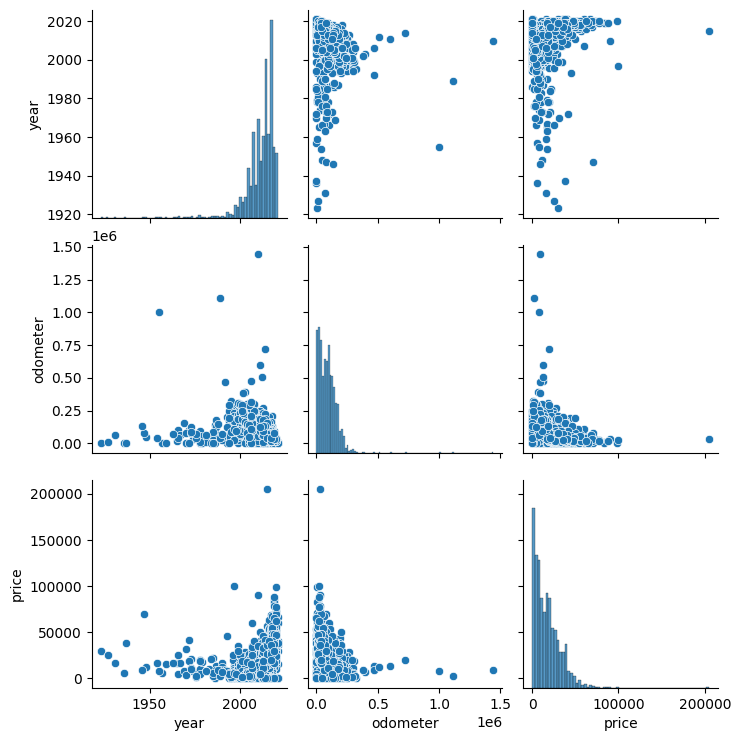

In [43]:
num_columns = ['year', 'odometer', 'price']
sns.pairplot(cars[num_columns].dropna().sample(2000, random_state=1))

Relation With Categorical Variables

In [44]:
#skewness and kurtosis
print("Skewness: %f" % cars['price'].skew())
print("Kurtosis: %f" % cars['price'].kurt())

'''
We can observe that the distribution of prices shows a high positive skewness to the left (skew > 1).
A kurtosis value of 69205 is extremely high, meaning that there is a profusion of outliers in the dataset. We need to do something.
'''

Skewness: 254.406932
Kurtosis: 69205.088590


'\nWe can observe that the distribution of prices shows a high positive skewness to the left (skew > 1).\nA kurtosis value of 69205 is extremely high, meaning that there is a profusion of outliers in the dataset. We need to do something.\n'

'\nPrices tend to be higher as cars are more recent, and viceversa.\n'

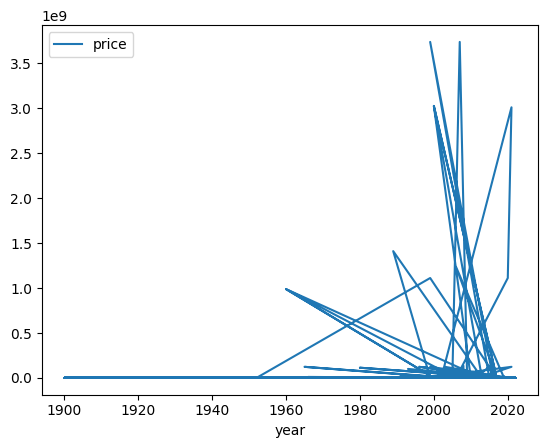

In [45]:
cars.plot(x='year', y='price');
"""
Prices tend to be higher as cars are more recent, and viceversa.
"""

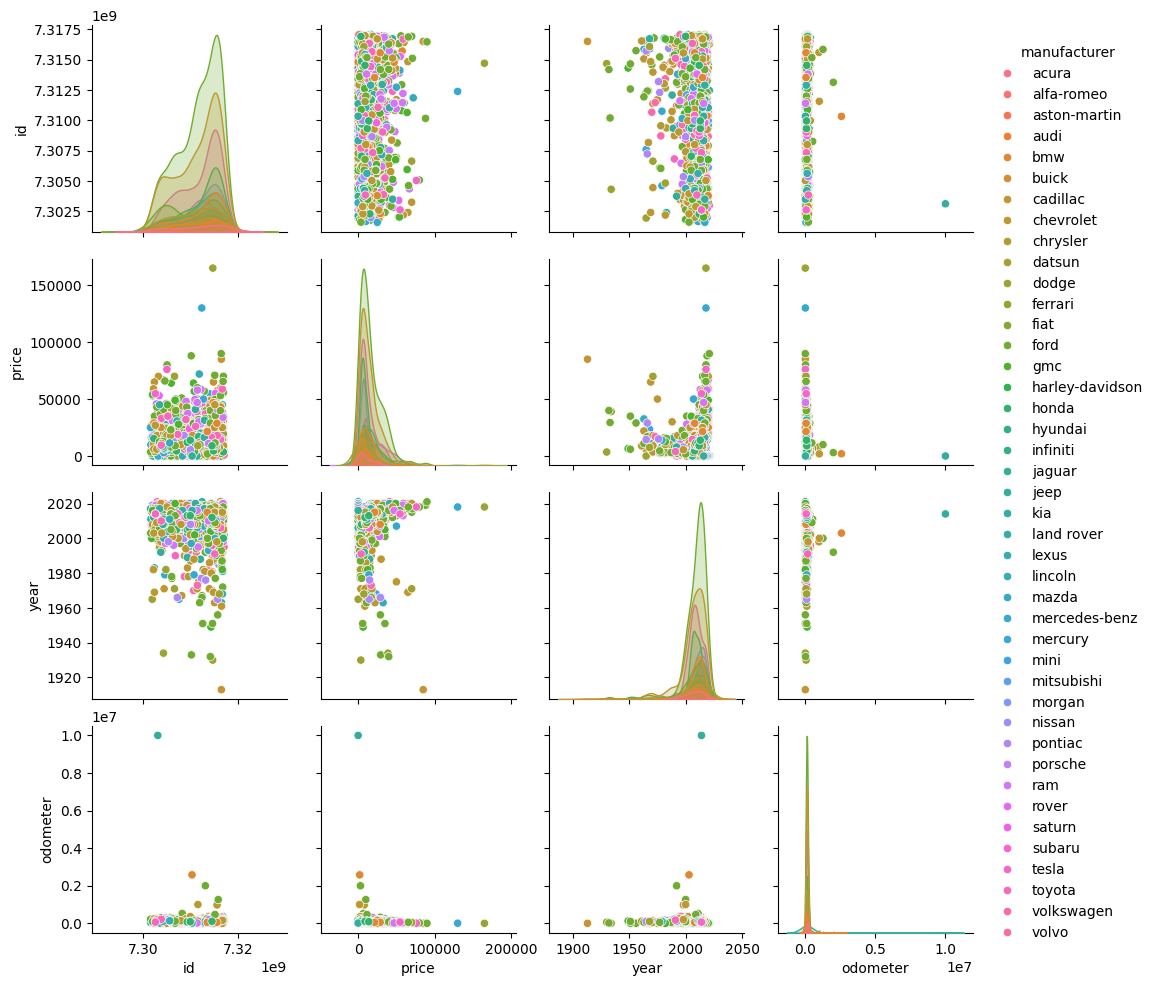

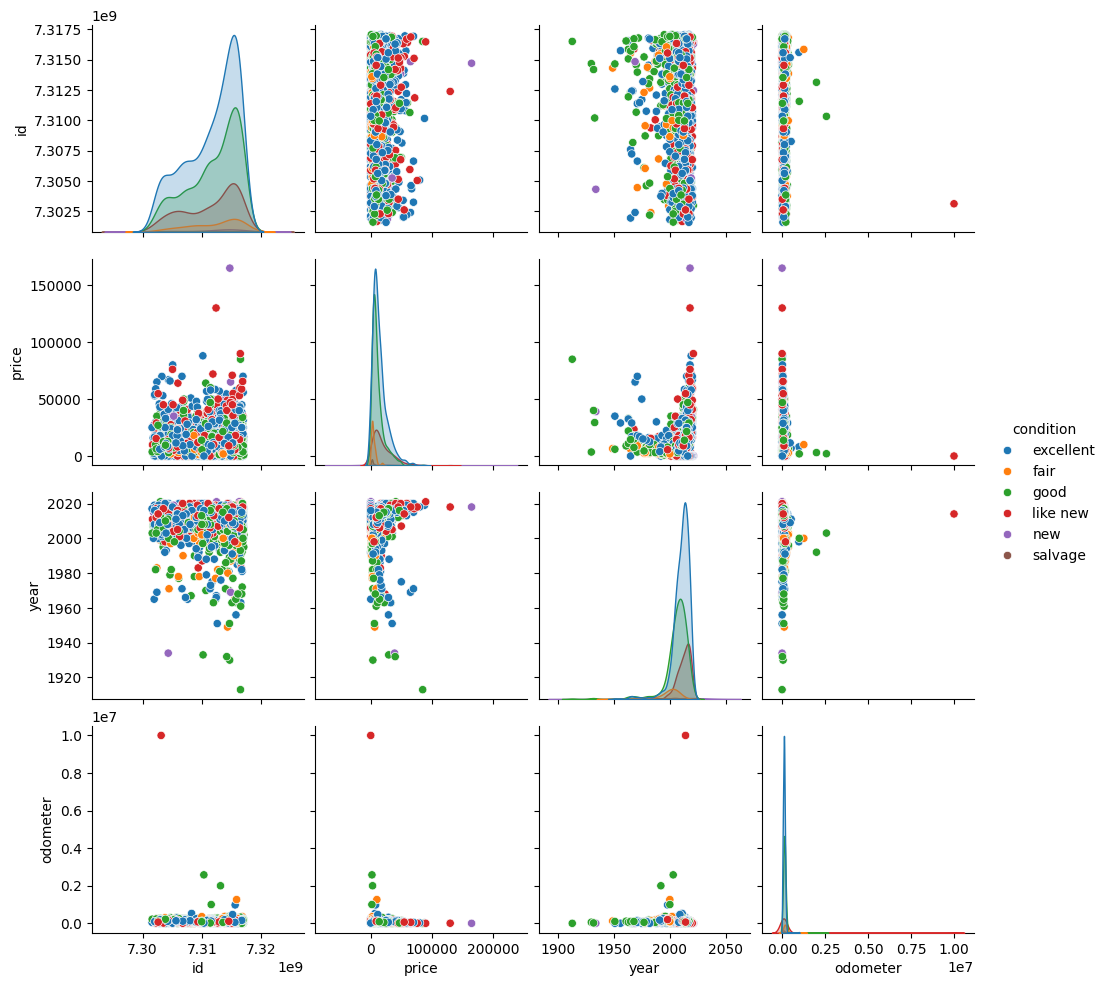

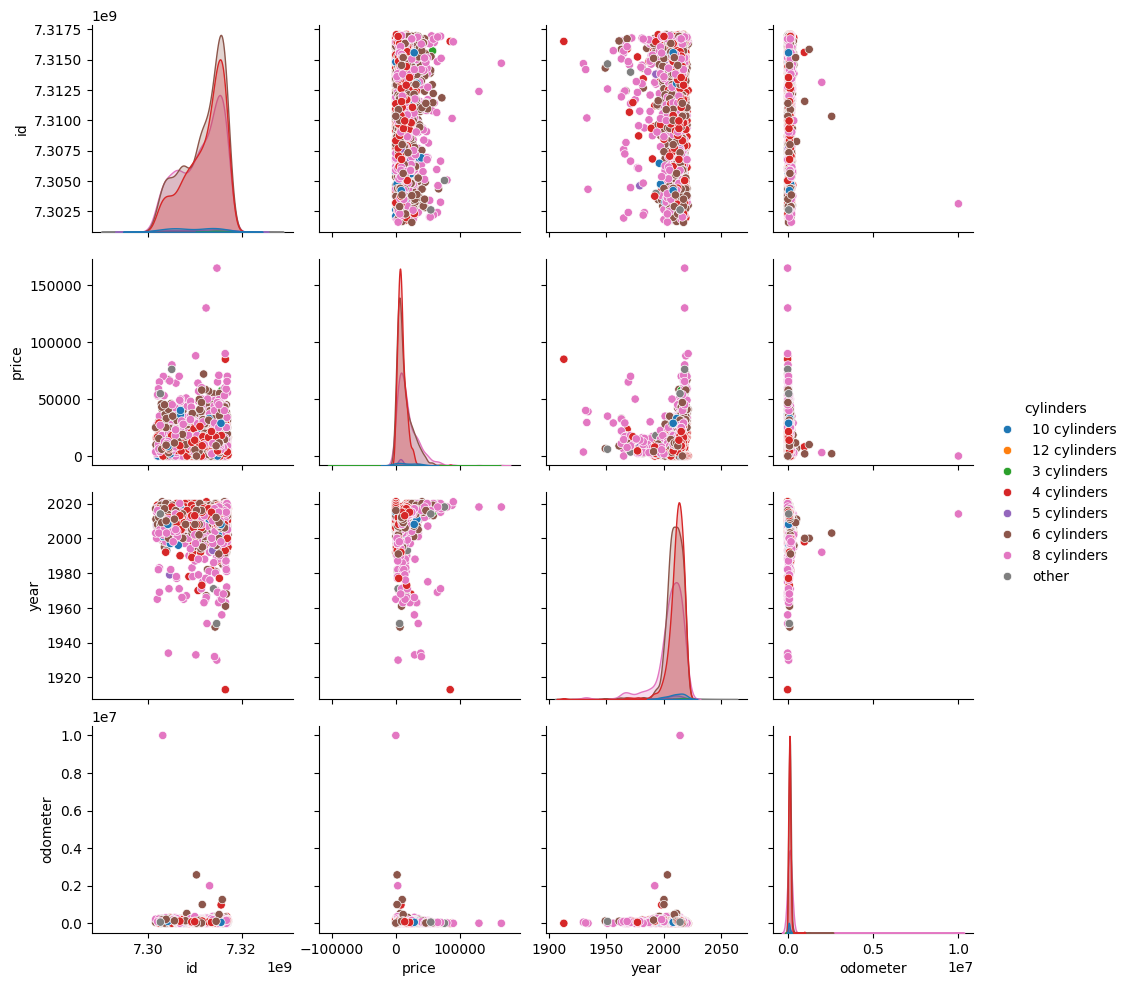

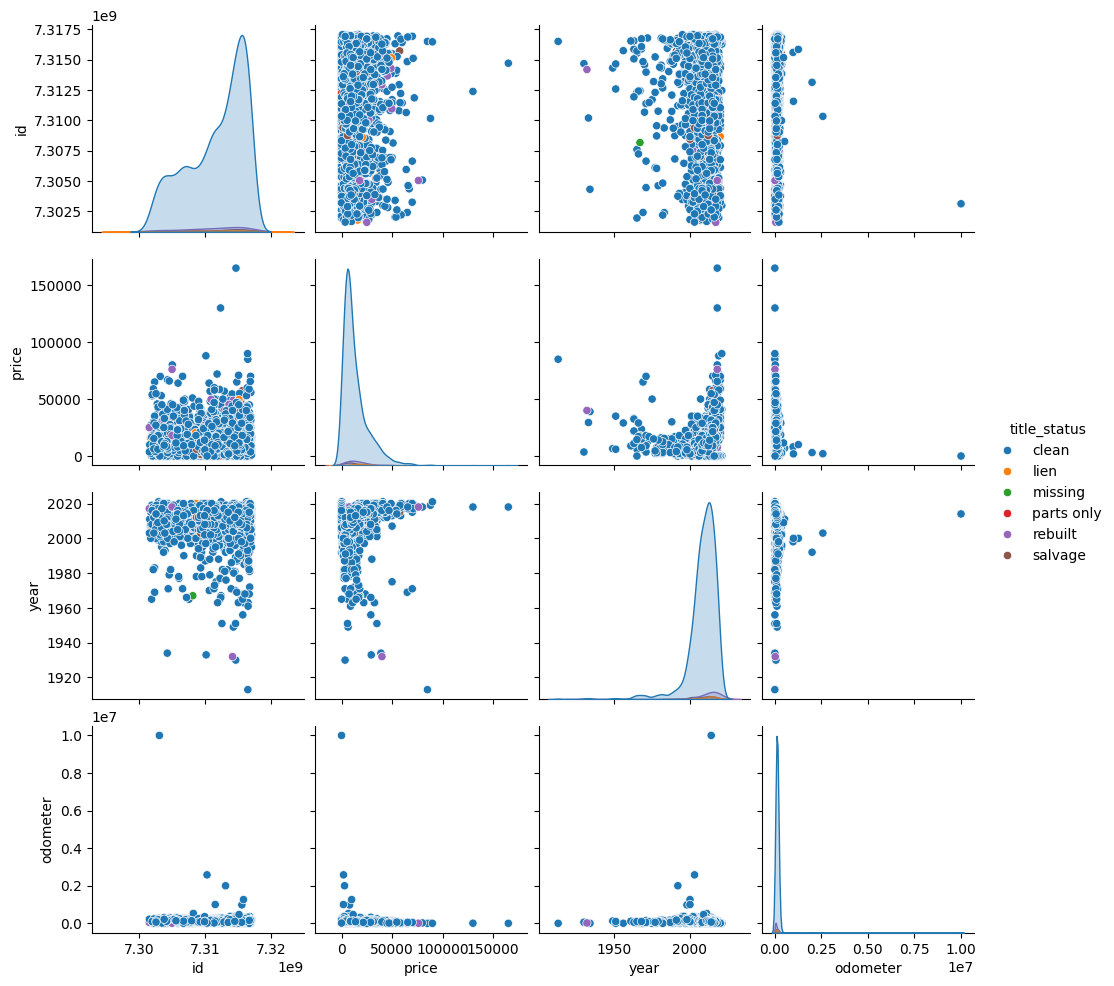

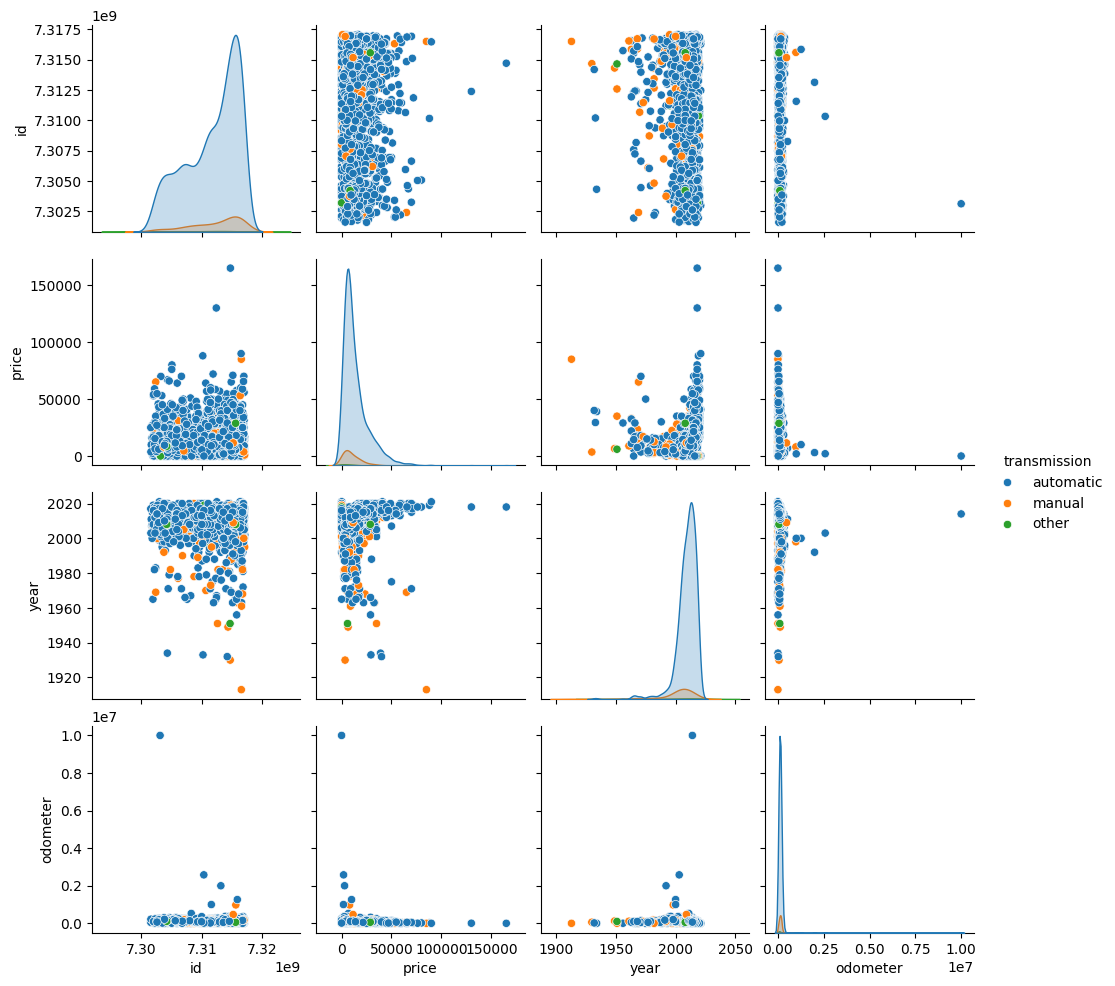

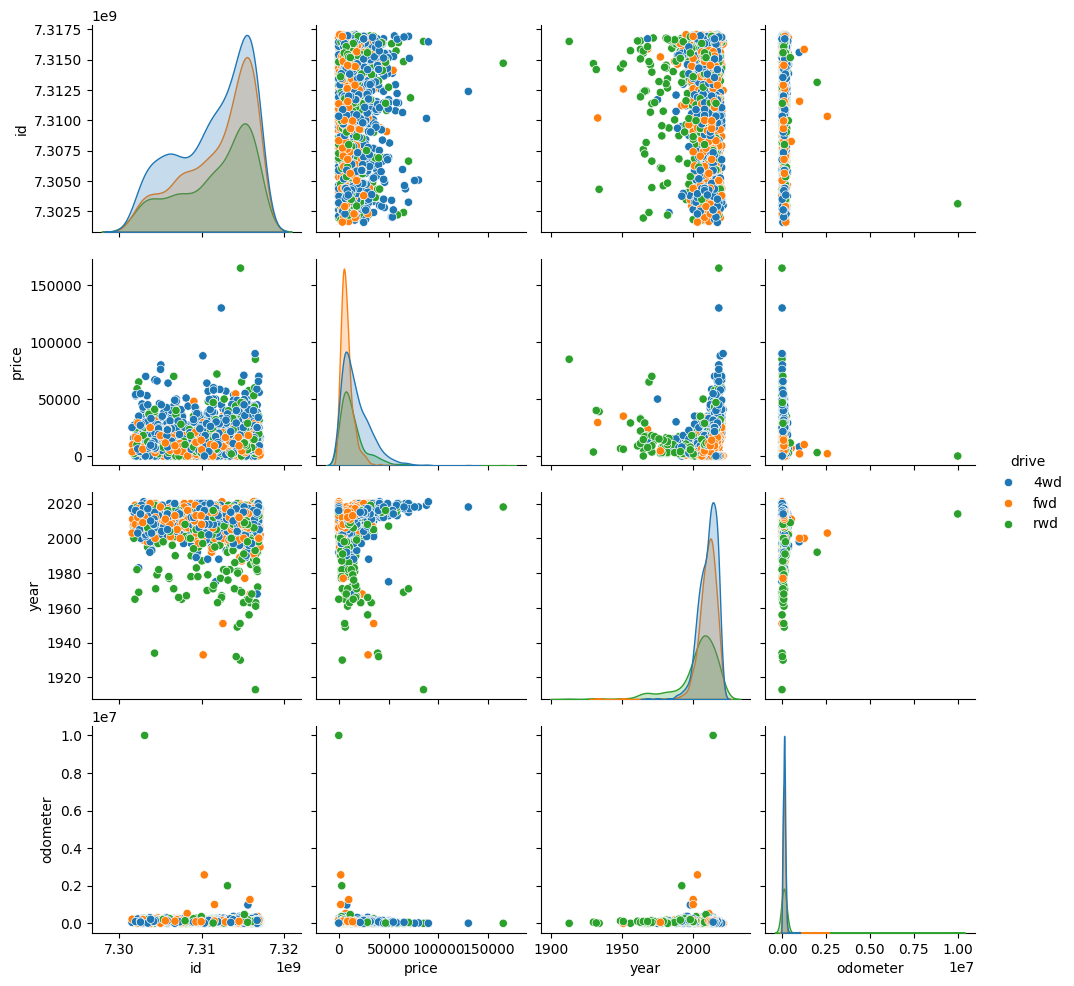

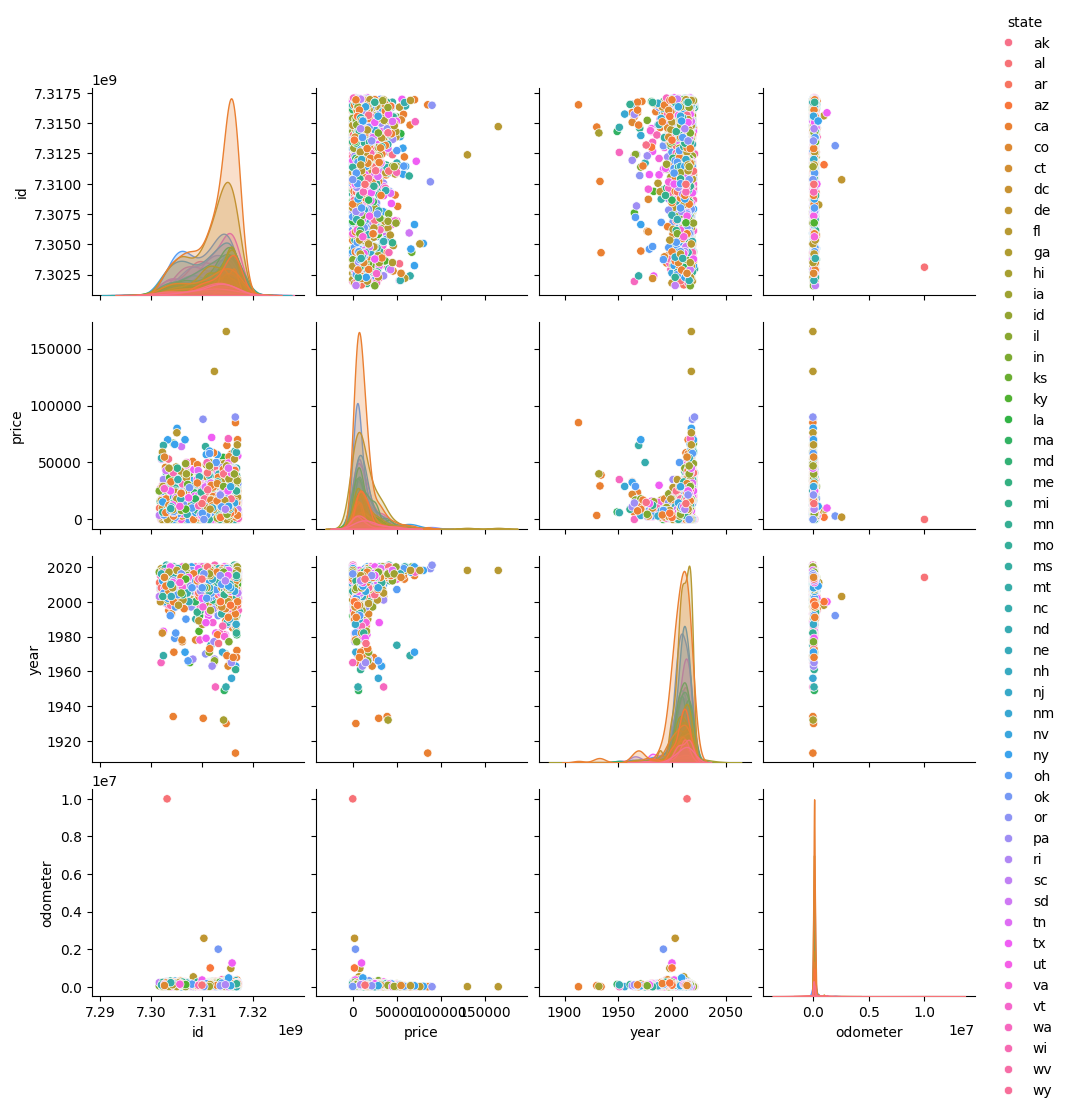

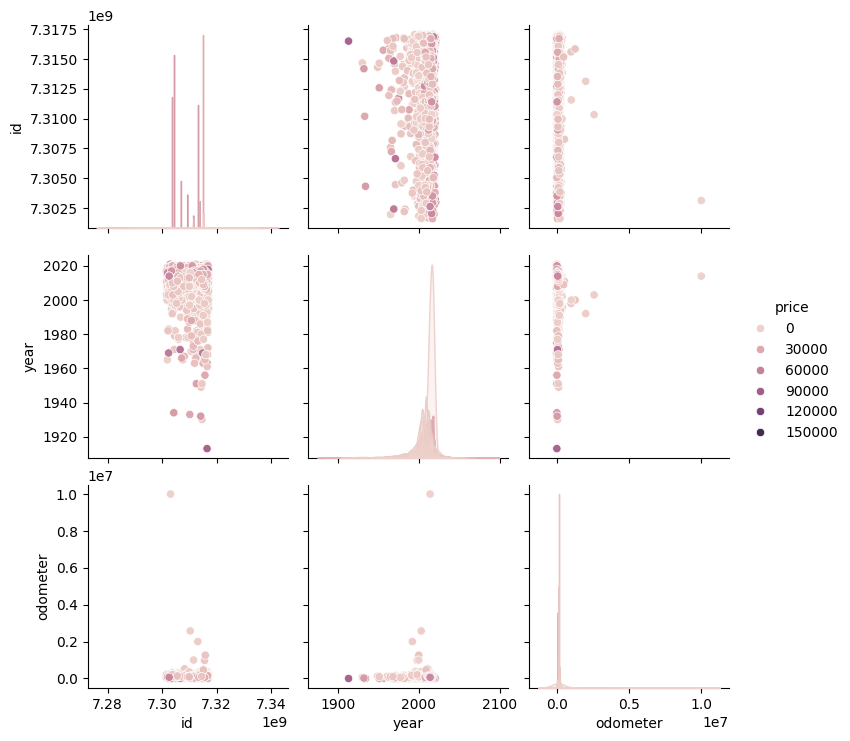

In [46]:
cat_columns = ['manufacturer',  'condition', 'cylinders','title_status',
               'transmission','drive','state','price']
for i in cat_columns:
    sns.pairplot(cars.dropna().sample(2000, random_state=1), hue=i)

In [47]:
cars.apply(lambda x : pd.factorize(x)[0]).corr()[['price']].sort_values('price', ascending=False)
'''
odometer, VIN, transmission, region, drive, model, cylinders, title status, year, condition will be considered for modelling
'''

'\nodometer, VIN, transmission, region, drive, model, cylinders, title status, year, condition will be considered for modelling\n'

/var/folders/cq/yzhfn67149sgrczrrzch0c0w0000gp/T/ipykernel_65883/678522692.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars.year)


<Axes: xlabel='year', ylabel='Density'>

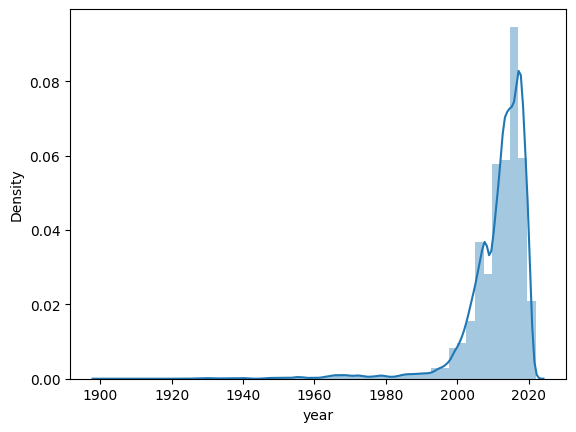

In [48]:
sns.distplot(cars.year)

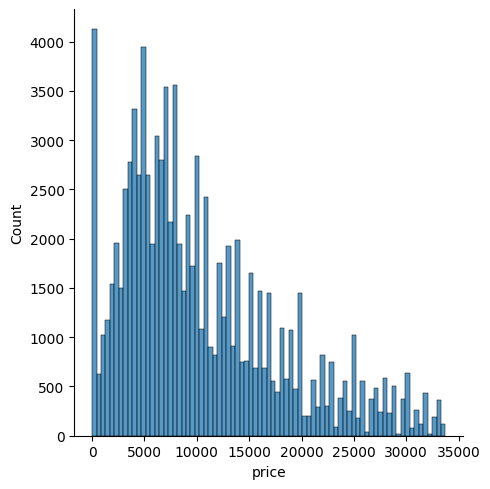

In [49]:
cars.VIN = cars.VIN.replace('nan', np.nan)

# dropping duplicates based on what I think are important to identify a car as unique
cleaned_cars = cars.drop_duplicates(['year', 'odometer', 'price', 'manufacturer','model', 'VIN'])

# dropping columns that are not really required
cleaned_cars = cleaned_cars.drop(["id", "state", 'VIN'], axis=1)

# remove columns that have NA
cleaned_cars = cleaned_cars.dropna(subset=['odometer', 'transmission', 'region',
                    'drive', 'model', 'cylinders','title_status', 'year', 'condition'])

# Remove outliers on price
cleaned_cars.price.describe()
def find_and_drop_outliers(df):
    q1=df['price'].quantile(0.25)
    q3=df['price'].quantile(0.75)
    iqr=q3-q1
    keep_df = df[~((df['price']<(q1-1.5*iqr)) | (df['price']>(q3+1.5*iqr)))]
    return keep_df
cleaned_no_ol_df = find_and_drop_outliers(cleaned_cars)
sns.displot(cleaned_no_ol_df['price'])


## Observations:

# dropping nas based on size reduces data sizes to 41K. Based on corr values,
#  better to keep out the from the features.
# dropping NAs based on the above features gives 101145 data points.

0.9812501073781169
0.3440988928507305


/Users/vaishnavin/Desktop/AIML_Berkeley/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


'\nThe skew factor and kurtosis have significantly reduced by just cleaning up the dataset and removing the outliers.\n'

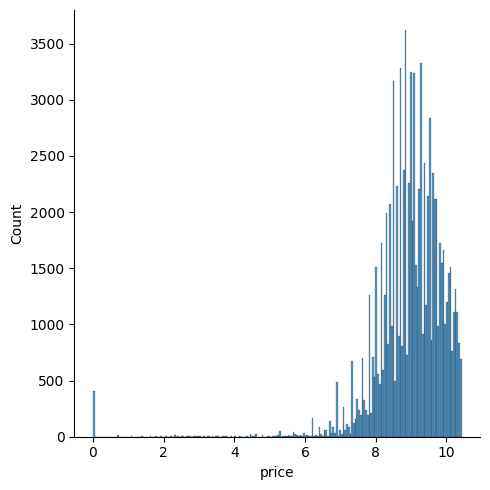

In [52]:
# check if we can get no skew normal distribution by log transforming
sns.displot(np.log(cleaned_no_ol_df['price']))
'''
Log trandforming the price makes it right skewed.
NVM - lets deal with the data as it is right now
'''

print(cleaned_no_ol_df.price.skew())
print(cleaned_no_ol_df.price.kurtosis())

'''
The skew factor and kurtosis have significantly reduced by just cleaning up the dataset and removing the outliers.
'''

/Users/vaishnavin/Desktop/AIML_Berkeley/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


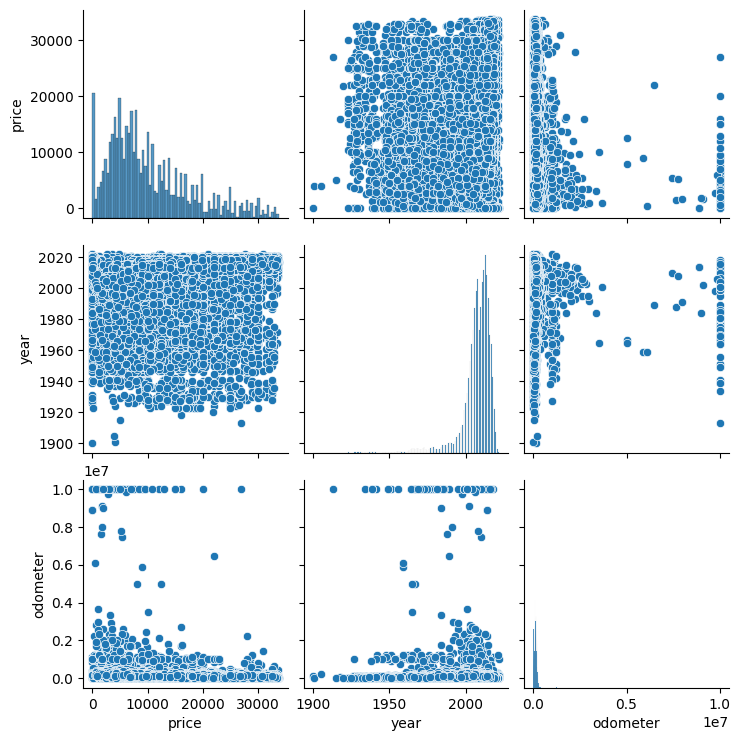

In [31]:
sns.pairplot(cleaned_no_ol_df, size = 2.5);

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [55]:
# using cleaned_no_ol_df for modelling
skim(cleaned_no_ol_df)
'''
There are NAs in manufacturer, size, type and paint_color column.
We will randomly impute these.
'''

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 94425  │ │ category    │ 12    │ │ region                │                                │
│ │ Number of columns │ 15     │ │ float64     │ 2     │ │ manufacturer          │                                │
│ └───────────────────┴────────┘ │ int64       │ 1     │ │ model                 │                                │
│                                └─────────────┴───────┘ │ condition             │                                │
│                                                        │ cylinders             │                                │
│                                                        │ fuel                  │                                │
│                                                        │ title_status          │                                │
│                                                        │ transmission          │                                │
│                                                        │ drive                 │                                │
│                                                        │ size                  │                                │
│                                                        │ type                  │                                │
│                                                        │ paint_color           │                                │
│                                                        └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA  ┃ NA %  ┃ mean     ┃ sd      ┃ p0    ┃ p25    ┃ p50     ┃ p75     ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ price         │   0 │     0 │    10000 │    7700 │     0 │   4800 │    8400 │   15000 │     34000 │ ▇▇▅▂▁▁ │  │
│ │ year          │   0 │     0 │     2000 │      11 │  1900 │   2000 │    2000 │    2000 │      2000 │     ▁▇ │  │
│ │ odometer      │   0 │     0 │   130000 │  270000 │     0 │  79000 │  120000 │  160000 │  10000000 │   ▇    │  │
│ └───────────────┴─────┴───────┴──────────┴─────────┴───────┴────────┴─────────┴─────────┴───────────┴────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                     ┃ NA              ┃ NA %           ┃ ordered             ┃ unique          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩  │
│ │ region                          │               0 │              0 │ False               │             402 │  │
│ │ manufacturer                    │            4211 │           4.46 │ False               │              42 │  │
│ │ model                           │               0 │              0 │ False               │           14603 │  │
│ │ condition                       │               0 │              0 │ False               │               6 │  │
│ │ cylinders                       │               0 │ 

'\nThere are NAs in manufacturer, size, type and paint_color column.\nWe will randomly impute these.\n'

In [62]:
## Impute manufacturer, size, type and paint_color
from feature_engine.imputation import RandomSampleImputer
imputer = RandomSampleImputer(
        variables=['manufacturer', 'size', 'type', 'paint_color'],
        random_state=1)
imputer.fit(cleaned_no_ol_df)
X = imputer.transform(cleaned_no_ol_df)
skim(X)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 94425  │ │ category    │ 12    │ │ region                │                                │
│ │ Number of columns │ 15     │ │ float64     │ 2     │ │ manufacturer          │                                │
│ └───────────────────┴────────┘ │ int64       │ 1     │ │ model                 │                                │
│                                └─────────────┴───────┘ │ condition             │                                │
│                                                        │ cylinders             │                                │
│                                                        │ fuel                  │                                │
│                                                        │ title_status          │                                │
│                                                        │ transmission          │                                │
│                                                        │ drive                 │                                │
│                                                        │ size                  │                                │
│                                                        │ type                  │                                │
│                                                        │ paint_color           │                                │
│                                                        └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA  ┃ NA %  ┃ mean     ┃ sd      ┃ p0    ┃ p25    ┃ p50     ┃ p75     ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ price         │   0 │     0 │    10000 │    7700 │     0 │   4800 │    8400 │   15000 │     34000 │ ▇▇▅▂▁▁ │  │
│ │ year          │   0 │     0 │     2000 │      11 │  1900 │   2000 │    2000 │    2000 │      2000 │     ▁▇ │  │
│ │ odometer      │   0 │     0 │   130000 │  270000 │     0 │  79000 │  120000 │  160000 │  10000000 │   ▇    │  │
│ └───────────────┴─────┴───────┴──────────┴─────────┴───────┴────────┴─────────┴─────────┴───────────┴────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA        ┃ NA %          ┃ ordered               ┃ unique            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩  │
│ │ region                             │         0 │             0 │ False                 │               402 │  │
│ │ manufacturer                       │         0 │             0 │ False                 │                41 │  │
│ │ model                              │         0 │             0 │ False                 │             14603 │  │
│ │ condition                          │         0 │             0 │ False                 │                 6 │  │
│ │ cylinders                          │         0 │    

In [100]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
from sklearn.metrics import mean_squared_error
set_config(display="diagram")

In [81]:
def sklearn_vif(exogs, data):

    # initialize dictionaries
    vif_dict = {}

    # form input data for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        X, y = data[not_exog], data[exog]

        # extract r-squared from the fit
        r_squared = LinearRegression().fit(X, y).score(X, y)

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict})

    return df_vif


In [84]:
display(sklearn_vif(['year','odometer'],X ).sort_values(by = "VIF", ascending = False))
'''
Not much VIF for both numeric variables.
'''

,VIF
odometer,1.007877
year,1.007877


'\nNot much VIF for both numeric variables.\n'

In [125]:
X = X.groupby('model').filter(lambda x: len(x)>2)

/var/folders/cq/yzhfn67149sgrczrrzch0c0w0000gp/T/ipykernel_65883/377824736.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  X = X.groupby('model').filter(lambda x: len(x)>2)


In [148]:

# Splitting the dataset into train and test sets
train_set, test_set = train_test_split(X, test_size = 0.3, random_state = 1, stratify=X['model'])

"""
The Test Set in this case is our Hold-out set that we'll be using later
for final validation
"""

# Separating target labels from the rest
cars_train = train_set.drop('price', axis=1) #train without target
cars_price_train = train_set['price'].copy() #target

cars_test  = test_set.drop('price', axis=1)
cars_price_test = test_set['price'].copy()
skim(cars_train)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 57254  │ │ category    │ 12    │ │ region                │                                │
│ │ Number of columns │ 14     │ │ float64     │ 2     │ │ manufacturer          │                                │
│ └───────────────────┴────────┘ └─────────────┴───────┘ │ model                 │                                │
│                                                        │ condition             │                                │
│                                                        │ cylinders             │                                │
│                                                        │ fuel                  │                                │
│                                                        │ title_status          │                                │
│                                                        │ transmission          │                                │
│                                                        │ drive                 │                                │
│                                                        │ size                  │                                │
│                                                        │ type                  │                                │
│                                                        │ paint_color           │                                │
│                                                        └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA  ┃ NA %  ┃ mean     ┃ sd      ┃ p0    ┃ p25    ┃ p50     ┃ p75     ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ year          │   0 │     0 │     2000 │     9.7 │  1900 │   2000 │    2000 │    2000 │      2000 │     ▂▇ │  │
│ │ odometer      │   0 │     0 │   130000 │  230000 │     0 │  81000 │  120000 │  160000 │  10000000 │   ▇    │  │
│ └───────────────┴─────┴───────┴──────────┴─────────┴───────┴────────┴─────────┴─────────┴───────────┴────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA        ┃ NA %          ┃ ordered               ┃ unique            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩  │
│ │ region                             │         0 │             0 │ False                 │               402 │  │
│ │ manufacturer                       │         0 │             0 │ False                 │                39 │  │
│ │ model                              │         0 │             0 │ False                 │              3621 │  │
│ │ condition                          │         0 │             0 │ False                 │                 6 │  │
│ │ cylinders                          │         0 │             0 │ False                 │                 8 │  │
│ │ fuel                               │         0 │    

In [149]:
skim(cars_test)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 24538  │ │ category    │ 12    │ │ region                │                                │
│ │ Number of columns │ 14     │ │ float64     │ 2     │ │ manufacturer          │                                │
│ └───────────────────┴────────┘ └─────────────┴───────┘ │ model                 │                                │
│                                                        │ condition             │                                │
│                                                        │ cylinders             │                                │
│                                                        │ fuel                  │                                │
│                                                        │ title_status          │                                │
│                                                        │ transmission          │                                │
│                                                        │ drive                 │                                │
│                                                        │ size                  │                                │
│                                                        │ type                  │                                │
│                                                        │ paint_color           │                                │
│                                                        └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA  ┃ NA %  ┃ mean     ┃ sd      ┃ p0    ┃ p25    ┃ p50     ┃ p75     ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ year          │   0 │     0 │     2000 │     9.6 │  1900 │   2000 │    2000 │    2000 │      2000 │     ▂▇ │  │
│ │ odometer      │   0 │     0 │   130000 │  270000 │     0 │  81000 │  120000 │  160000 │  10000000 │   ▇    │  │
│ └───────────────┴─────┴───────┴──────────┴─────────┴───────┴────────┴─────────┴─────────┴───────────┴────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA        ┃ NA %          ┃ ordered               ┃ unique            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩  │
│ │ region                             │         0 │             0 │ False                 │               397 │  │
│ │ manufacturer                       │         0 │             0 │ False                 │                39 │  │
│ │ model                              │         0 │             0 │ False                 │              3621 │  │
│ │ condition                          │         0 │             0 │ False                 │                 6 │  │
│ │ cylinders                          │         0 │             0 │ False                 │                 8 │  │
│ │ fuel                               │         0 │    

In [150]:
col_transformer = make_column_transformer((OrdinalEncoder(), ['region', 'manufacturer','model','condition', 'cylinders',
       'fuel','title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color']), remainder='passthrough')

linear_steps = [('ColTrfm', col_transformer),
         ('lr', LinearRegression())]

pipe = Pipeline(linear_steps)

pipe.fit(cars_train, cars_price_train)
pipe
train_preds = pipe.predict(cars_train)
train_mse = mean_squared_error(train_preds, cars_price_train)

test_preds = pipe.predict(cars_test)
test_mse = mean_squared_error(test_preds, cars_price_test)
print(train_mse, test_mse)

47380575.03742213 47013843.09981483


#### Ridge Regression

In [210]:
poly = PolynomialFeatures(include_bias=False)
col_transformer = make_column_transformer((OrdinalEncoder(), ['region', 'manufacturer','model','condition', 'cylinders',
       'fuel','title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color']), remainder=poly)

ridge_steps = [('ColTrfm', col_transformer),
         ('rreg', Ridge(random_state=1))]

pipe = Pipeline(ridge_steps)
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 10, 100, 1000, 10000]
degrees = [2,3]
cv = 5
param_dict = {'rreg__alpha':alphas,
              'ColTrfm__remainder__degree':degrees}
grid = GridSearchCV(pipe,
                    param_grid=param_dict,
                    refit=True,
                    scoring='neg_mean_squared_error',
                    cv=cv)
grid.fit(cars_train, cars_price_train)
display(grid.best_estimator_)
display(grid.best_params_)

Pipeline(steps=[('ColTrfm',
                 ColumnTransformer(remainder=PolynomialFeatures(include_bias=False),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['region', 'manufacturer',
                                                   'model', 'condition',
                                                   'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type',
                                                   'paint_color'])])),
                ('rreg', Ridge(alpha=1e-05, random_state=1))])

{'ColTrfm__remainder__degree': 2, 'rreg__alpha': 1e-05}

In [211]:
grid.best_estimator_

Pipeline(steps=[('ColTrfm',
                 ColumnTransformer(remainder=PolynomialFeatures(include_bias=False),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['region', 'manufacturer',
                                                   'model', 'condition',
                                                   'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'size', 'type',
                                                   'paint_color'])])),
                ('rreg', Ridge(alpha=1e-05, random_state=1))])

In [212]:
from sklearn.metrics import mean_squared_error
best_coef_extract_model = grid.best_estimator_
best_coef_extract_model.fit(cars_train, cars_price_train)
train_preds = best_coef_extract_model.predict(cars_train)
test_preds = best_coef_extract_model.predict(cars_test)
train_mse = mean_squared_error(train_preds, cars_price_train)
test_mse = mean_squared_error(test_preds, cars_price_test)
ridge_mses = [train_mse, test_mse]
display(train_mse, test_mse)
display(best_coef_extract_model.feature_names_in_)
display(best_coef_extract_model.named_steps['rreg'].coef_)
feature_names = best_coef_extract_model[:-1].get_feature_names_out()

ridge_coef_df = pd.DataFrame({'feature': feature_names, 'coef': best_coef_extract_model.named_steps['rreg'].coef_})
ridge_coef_df.sort_values('coef', ascending=False)

36552701.727720305

36889614.46411163

array(['region', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color'], dtype=object)

array([ 8.88672926e-02,  2.53427506e+01, -2.63443179e-02, -1.98959001e+02,
        1.91005798e+03, -2.36544892e+03, -2.55016741e+02,  2.55941947e+03,
       -6.48597196e+02, -9.75392160e+01, -2.73186396e+01,  3.36821079e+01,
       -4.25094127e+04,  7.98586068e-02,  1.07174220e+01, -4.97331579e-05,
        1.89099386e-09])

,feature,coef
7,ordinalencoder__transmission,2.559419e+03
4,ordinalencoder__cylinders,1.910058e+03
11,ordinalencoder__paint_color,3.368211e+01
1,ordinalencoder__manufacturer,2.534275e+01
14,remainder__year^2,1.071742e+01
0,ordinalencoder__region,8.886729e-02
13,remainder__odometer,7.985861e-02
16,remainder__odometer^2,1.890994e-09
15,remainder__year odometer,-4.973316e-05
2,ordinalencoder__model,-2.634432e-02


In [240]:
## Feature Select using Lasso
## define SFS+Laso pipe
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
col_transformer = make_column_transformer((OrdinalEncoder(), ['region', 'manufacturer','model','condition', 'cylinders',
       'fuel','title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color']), remainder=poly_2)


import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import SequentialFeatureSelector

sequential_pipe = Pipeline([('ColTrfm', col_transformer),
                            ('selector', SequentialFeatureSelector(Ridge(random_state=1, alpha=1e-05), n_features_to_select=5)),
                           ('rreg', Ridge(random_state=1,alpha=1e-05))])

sequential_pipe.fit(cars_train, cars_price_train)
test_preds = sequential_pipe.predict(cars_test)
train_preds = sequential_pipe.predict(cars_train)
train_mse = mean_squared_error(train_preds, cars_price_train)
test_mse = mean_squared_error(test_preds, cars_price_test)
print(train_mse, test_mse)
sfs_lasso_mse = [train_mse,test_mse]
print(sequential_pipe.named_steps['rreg'].coef_)
print(sequential_pipe[:-1].get_feature_names_out())

39064686.84848671 39434513.29753357
[ 1.82529194e+03 -2.07287232e+03  2.72162416e+03 -4.93825280e+04
  1.24486130e+01]
['ordinalencoder__cylinders' 'ordinalencoder__fuel'
 'ordinalencoder__transmission' 'remainder__year' 'remainder__year^2']


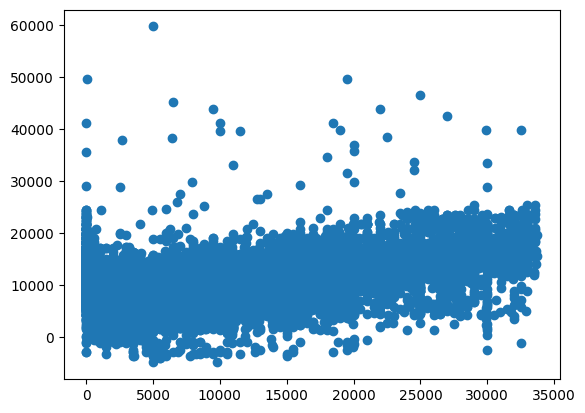

In [241]:
import matplotlib.pyplot as plt
plt.scatter(cars_price_test.values, test_preds)

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

From the above results, it looks like the year, number of cylinders, fuel type and transmission type are the most important features for predicting car price.
As as car dealer, it would be useful if you advertise year car was manufactured, the number of cylinders, transmission type and fuel.
